In [2]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#load dataset
df=pd.read_csv('/content/drive/MyDrive/Data/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
#explore and summary
print(df.head())
print(df.info())
print(df.describe(include='all'))

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [6]:
#handle missing values
print(df.isnull().sum())
df.dropna(inplace=True)

YearsExperience    0
Salary             0
dtype: int64


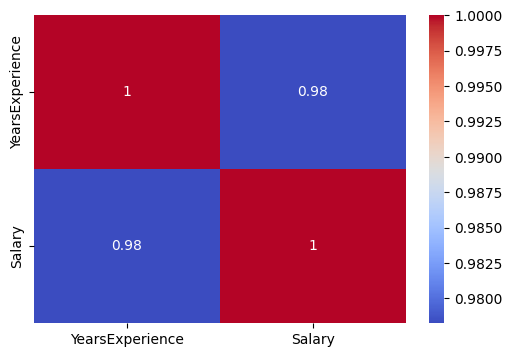

In [7]:
#correlation heatmap
numeric=df.select_dtypes(include=np.number)
corr=numeric.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

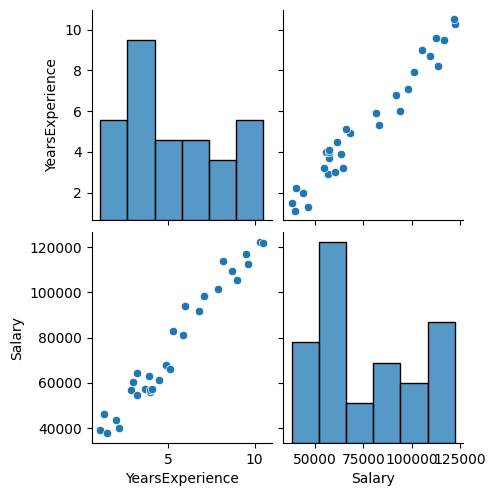

In [8]:
#pairplot to view relationship
sns.pairplot(numeric)
plt.show()

In [9]:
#prepare data for modelling
X=df[['YearsExperience']]
Y=df['Salary']

In [10]:
#split train/test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
# Predict and Evaluate
y_pred = model.predict(X_test)
print(" Coefficient (slope):", model.coef_[0])
print(" Intercept:", model.intercept_)
print(" R² Score:", r2_score(Y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred))

 Coefficient (slope): 9423.815323030976
 Intercept: 25321.583011776813
 R² Score: 0.9024461774180497
Mean Squared Error: 49830096.85590839


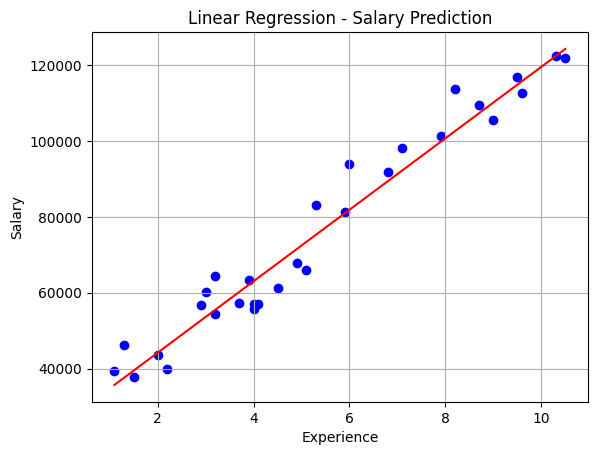

In [18]:
#PLOT REGRESSION LINE
plt.scatter(X, Y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Linear Regression - Salary Prediction")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()